# PIV 2024: HW-1  

Images **320.jpg** (grayscale) and **330.jpg** (RGB) are two frames from the same camera mounted on the front of a moving car. They have same **focal length = 1180.0**. The principal point is at the center of the images. The depth map **320_depth.npy** is registered to frame 320.

Your job is to compute the pointcloud corresponding to frame 320 and color it using the RGB values from frame 330. For this, you will have to:

1.   Build the camera matrix and unproject the depth map (**320_depth.npy**) corresponding to the grayscale image (**320.jpg**) to get a grayscale 3D point cloud.
2.   Given the 2D correspondences between the 2 frames (**320_330_matches.npy**), find the 3D rigid transformation between the cameras.
3.   Color the point cloud from step 1 using the RGB values from **330.jpg**


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

### Get the data from the Drive

This will download **320.jpg** (grayscale), **330.jpg** (RGB), the depth map corresponding to frame 320 **320_depth.npy** and a set of point matches between the images stored as **320_330_matches.npy**

In [3]:
# Get images 320 and 330
! gdown 1IHkv4ri4CwL2A0f4bw2Y1dm7rHftL9Yh
! gdown 1ttU0N4UWj2UedpErslIXjiE1kAUdzI76
# Get depth map
! gdown 11dBTamoXfRDOt12pCHlLQ7IV6eJ23HWb
# Get matches between images
! gdown 1M1XXHorleaIH1lY6Jbxb5at4wrHv4Cor

Downloading...
From: https://drive.google.com/uc?id=1IHkv4ri4CwL2A0f4bw2Y1dm7rHftL9Yh
To: c:\Users\HYEJOO KWON\Downloads\PIV\PIV_project\330.jpg

  0%|          | 0.00/109k [00:00<?, ?B/s]
100%|██████████| 109k/109k [00:00<00:00, 11.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ttU0N4UWj2UedpErslIXjiE1kAUdzI76
To: c:\Users\HYEJOO KWON\Downloads\PIV\PIV_project\320.jpg

  0%|          | 0.00/114k [00:00<?, ?B/s]
100%|██████████| 114k/114k [00:00<00:00, 2.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=11dBTamoXfRDOt12pCHlLQ7IV6eJ23HWb
To: c:\Users\HYEJOO KWON\Downloads\PIV\PIV_project\320_depth.npy

  0%|          | 0.00/4.56M [00:00<?, ?B/s]
 12%|█▏        | 524k/4.56M [00:00<00:00, 4.99MB/s]
 81%|████████  | 3.67M/4.56M [00:00<00:00, 18.5MB/s]
100%|██████████| 4.56M/4.56M [00:00<00:00, 17.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1M1XXHorleaIH1lY6Jbxb5at4wrHv4Cor
To: c:\Users\HYEJOO KWON\Downloads\PIV\PIV_project\320_330_matches.npy

  0%|   

### Load images and depth maps as NumPy arrays

**320.jpg** (grayscale) and **330.jpg** (RGB) are stored as 890 x 1280 x 3 arrays.
The depth map is stored as a 890 x 1280 array with values up to 50m.


Text(0.5, 1.0, 'Depth map of image 1')

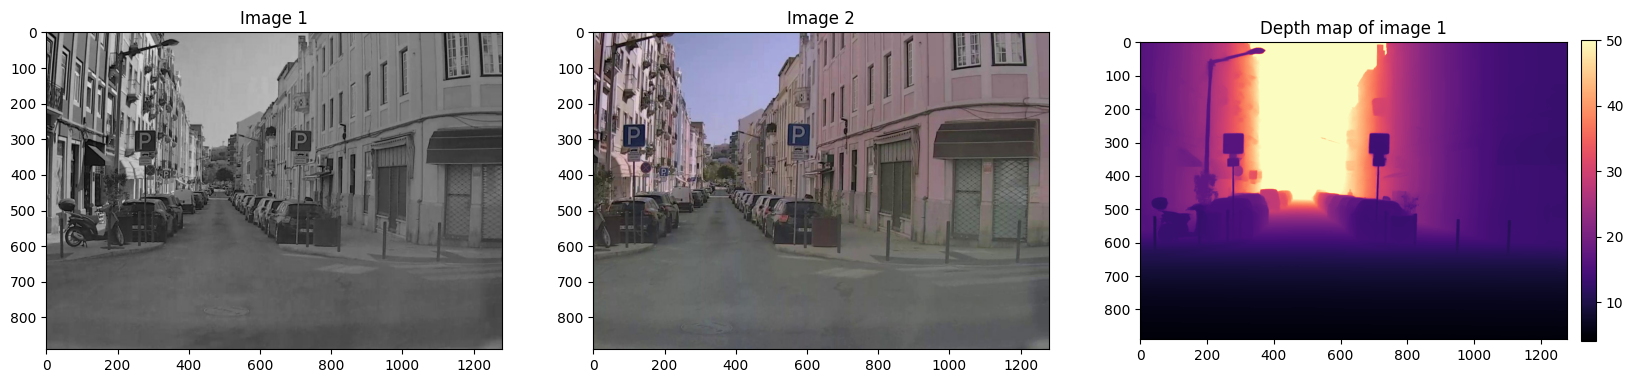

In [4]:
img1 = np.array(Image.open('320.jpg'))
img2 = np.array(Image.open('330.jpg'))
depth1 = np.load('320_depth.npy')

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.title("Image 1")
plt.subplot(1,3,2)
plt.imshow(img2)
plt.title("Image 2")
plt.subplot(1,3,3)
plt.imshow(depth1, cmap="magma")
plt.colorbar(fraction=0.033, pad=0.03)
plt.title("Depth map of image 1")

### Load and visualize 2D correspondences
Matches are stored as a 1159 x 2 x 2 array (1159 matches, 2 coordinates x and y and 2 images).

These matches were computed with [CoTracker](https://co-tracker.github.io/). You can also compute your own matches using SIFT (import OpenCV with `import cv2`).


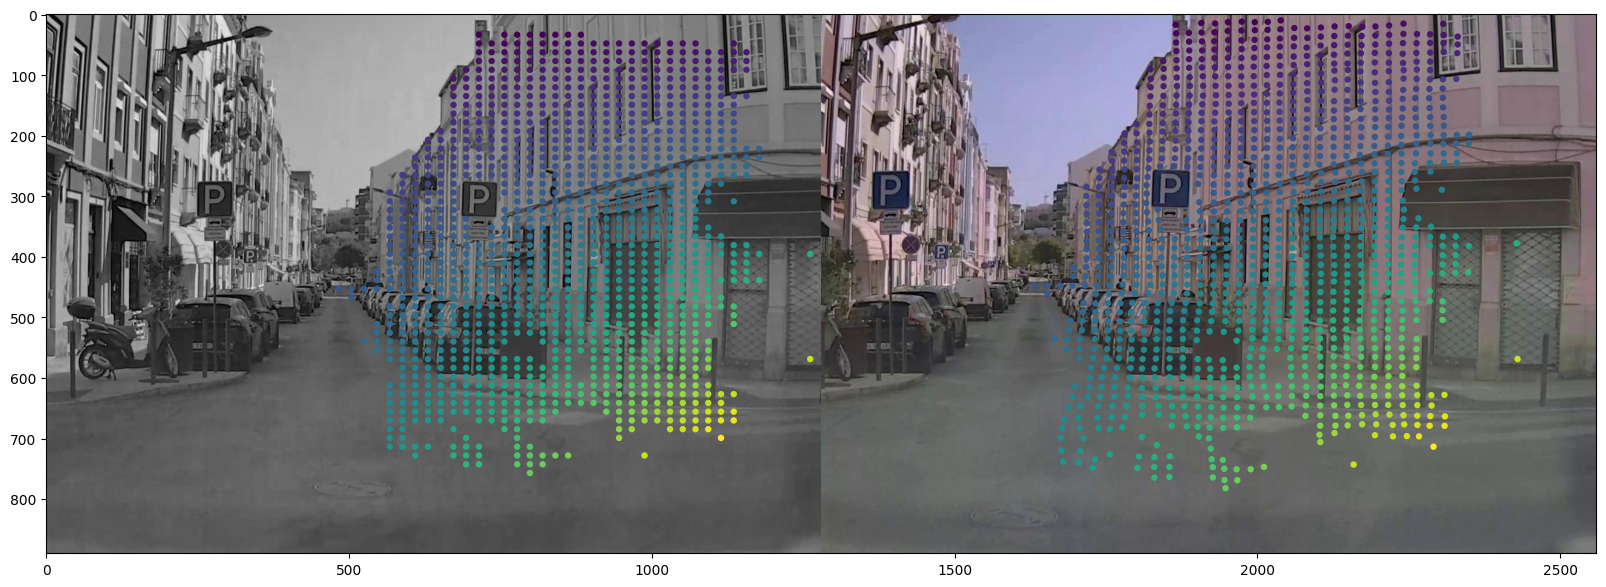

In [5]:
matches = np.load("320_330_matches.npy")

cmap = matplotlib.colormaps['Spectral']

plt.figure(figsize=(20,10))

side_by_side = np.concatenate((img1, img2), axis=1)
plt.imshow(side_by_side)
plt.scatter(matches[:,0,0], matches[:,1,0], 13, c=matches[:,0,0] * matches[:,1,0])
plt.scatter(matches[:,0,1] + img1.shape[1], matches[:,1,1], 13, c=matches[:,0,0] * matches[:,1,0])

In [7]:
!pip3 install open3d


  Using cached open3d-0.19.0-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached dash-3.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached flask-3.1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached configargparse-1.7.1-py3-none-any.whl.metadata (24 kB)
  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached importlib_metadata-8.7.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadat

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\HYEJOO KWON\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\dash\\development\\_jl_components_generation.py'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\HYEJOO KWON\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Visualizing your point clouds

You can store your point clouds as .ply files with Open3D (install it first with `pip install open3d`) and use [MeshLab](https://www.meshlab.net/) for visualization.

Below is some code you can use to save your point clouds.


In [8]:

import open3d as o3d

points = np.array([]) # EDIT AND PUT your point cloud
rgb = np.array([]) # EDIT AND PUT your colors

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
pcd.colors = o3d.utility.Vector3dVector(rgb)
o3d.io.write_point_cloud(f"./colored_pc.ply", pcd)

ModuleNotFoundError: No module named 'open3d'


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\HYEJOO KWON\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/69.2 MB ? eta -:--:--
   ---------------------------------------- 0.6/69.2 MB 20.1 MB/s eta 0:00:04
    --------------------------------------- 1.6/69.2 MB 26.1 MB/s eta 0:00:03
    --------------------------------------- 1.6/69.2 MB 26.1 MB/s eta 0:00:03
   - -------------------------------------- 3.0/69.2 MB 17.4 MB/s eta 0:00:04
   -- ------------------------------------- 4.5/69.2 MB 20.7 MB/s eta 0:00:04
   --- ------------------------------------ 6.3/69.2 MB 23.5 MB/s eta 0:00:03
   ---- ----------------------------------- 7.8/69.2 MB 24.8 MB/s eta 0:00:03
   ----- ---------------------------------- 9.5/69.2 MB 26.5 MB/s eta 0:00:03
   ------ --------------------------------- 10.8/69.2 MB 28.4 MB/s eta 0:00:03
   ------- -------------------------------- 12.6/69.2 MB 34.4 MB/s eta 0:00:02
   -------- ------------------------------- 14.0/69.2 MB 32.7 MB/s eta 0:00:02
   --------- ------------------------------ 15.8/69.2 MB 32.7 MB/s et